#  Logistic Regression

In [111]:
import numpy as np
import pandas as pd

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [64]:
df = pd.read_csv('diabetes.csv')

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
# to check null values in dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
zero = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero:
    df[col] = df[col].replace(0,np.NaN)
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.NaN,mean)

In [86]:
# for extracting specfic rows and columns from dataset

x = df.iloc[:,:-1].values
y = df.iloc[:,8]

In [87]:
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Text(0, 0.5, 'Glucose')

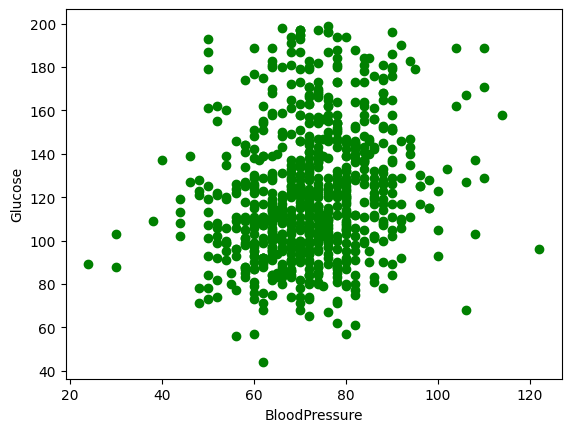

In [101]:
# plotting graph using matplotlib

plt.scatter(df['BloodPressure'], df['Glucose'], color = 'green')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')

In [102]:
model = LogisticRegression()

In [105]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.169471,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.169471,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.239130,0.169471,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [106]:
model.fit(x_train, y_train)

C:\Users\Asher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [110]:
score = accuracy_score(y_test,predictions)*100
score

80.51948051948052

# K Means Algorithm


In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [114]:
df = pd.read_csv('Lab05.csv')

In [115]:
df.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,842,0,2.2,0,1,0,7,0.6,188,...,2,20,756,2549,9,7,19,0,0,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,6,905,1988,2631,17,3,7,1,1,0
2,2,563,1,0.5,1,2,1,41,0.9,145,...,6,1263,1716,2603,11,2,9,1,1,0
3,3,615,1,2.5,0,0,0,10,0.8,131,...,9,1216,1786,2769,16,8,11,1,0,0
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,14,1208,1212,1411,8,2,15,1,1,0


In [123]:
li= []
for feature in df:
    if len(df[feature].unique()) < 3:
        li.append(feature)

In [124]:
li

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [125]:
df = df.drop(columns = li)

In [126]:
df.head()

,Unnamed: 0,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [156]:
# using K MEANS for feature selection

X = df.iloc[:,1:16]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

In [157]:
kmeans_labels

array([3, 0, 0, ..., 1, 2, 1])

In [158]:
y = kmeans_labels
y

array([3, 0, 0, ..., 1, 2, 1])

In [159]:
x = df

In [160]:
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [161]:
model = LogisticRegression()

In [163]:
# Normalization

scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns = names)
scaled_df.head()

,Unnamed: 0,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.000000,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.000500,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.001001,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.001501,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.002001,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222


In [164]:
model.fit(x_train, y_train)

C:\Users\Asher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
predictions = model.predict(X_test)
predictions

array([1, 2, 3, 3, 1, 2, 2, 3, 1, 3, 0, 1, 2, 3, 1, 2, 1, 3, 3, 3, 2, 2,
       1, 0, 0, 3, 1, 0, 1, 2, 3, 2, 3, 2, 3, 1, 2, 0, 1, 1, 1, 0, 1, 1,
       3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 1, 1, 0, 2, 1, 1, 0, 1, 3, 3, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 3, 3, 0, 1, 0, 1, 2, 2, 2, 3, 0,
       0, 1, 0, 3, 0, 3, 2, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 3, 1, 3, 3, 0, 0, 3, 1, 0, 1, 3, 3, 2, 2, 2, 1, 2, 1,
       1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 3, 1, 2, 1, 2, 2, 1, 2, 0, 3, 0, 0,
       1, 2, 2, 1, 2, 0, 3, 0, 3, 0, 1, 1, 1, 1, 2, 0, 1, 3, 3, 1, 1, 2,
       3, 3, 1, 2, 1, 3, 3, 3, 1, 2, 3, 2, 1, 1, 0, 1, 2, 3, 1, 3, 2, 1,
       0, 2, 1, 1, 1, 2, 0, 3, 3, 1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 1,
       1, 1, 2, 2, 1, 3, 3, 3, 2, 1, 0, 3, 2, 0, 3, 2, 0, 3, 2, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 3, 2, 3, 2, 0, 1, 1, 0, 2, 2, 0, 1,
       1, 3, 3, 1, 1, 3, 2, 1, 3, 0, 3, 1, 1, 1, 1, 3, 2, 3, 3, 2, 2, 2,
       3, 1, 1, 1, 2, 3, 3, 2, 0, 1, 1, 2, 0, 2, 2,

In [166]:
score = accuracy_score(y_test, predictions) * 100
score

83.25

<AxesSubplot: ylabel='count'>

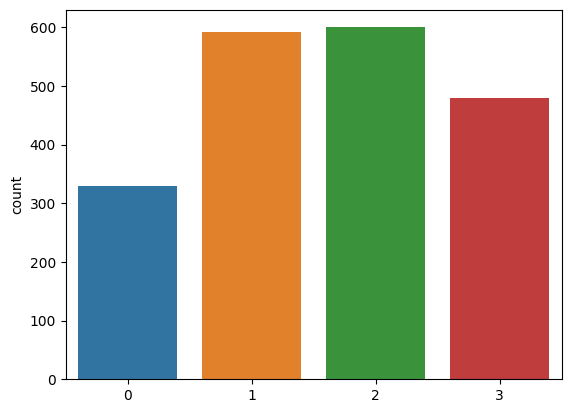

In [167]:
sn.countplot(x = y)

# Regularization

In [190]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [169]:
df = pd.read_csv('kc_house_data.csv')

In [170]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [171]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [172]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [173]:
df = df.drop(columns = ['date','waterfront','grade','view','yr_renovated','sqft_basement'])

In [175]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,1180.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,2170.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,770.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,1050.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,1680.0,1987,98074,47.6168,-122.045,1800,7503


In [177]:
df['sqft_above'] = df['sqft_above'].fillna(0)

In [178]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,1180.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,2170.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,770.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,1050.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,1680.0,1987,98074,47.6168,-122.045,1800,7503


In [179]:
x = df
y = df['price']

In [180]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Count'>

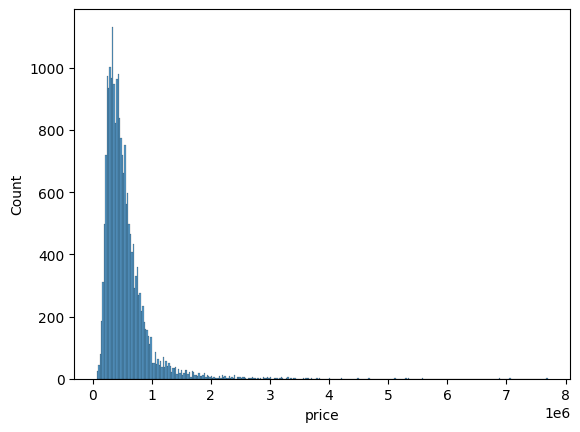

In [181]:
sn.histplot(data = df, x = df['price'])

In [182]:
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [183]:
model = LinearRegression()

In [187]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns = names)
scaled_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.5,0.125399,0.478261,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.5,0.230606,0.443478,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.5,0.081828,0.286957,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,1.0,0.111583,0.565217,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.5,0.178533,0.756522,0.368687,0.741354,0.393688,0.241094,0.007871


In [188]:
model.fit(x_train, y_train)

LinearRegression()

In [189]:
predictions = model.predict(X_test)
predictions

array([ 297000., 1578000.,  562100., ...,  369950.,  300000.,  575950.])

In [191]:
mean_squared_error(y_test, predictions)

7.952200222046684e-20

In [194]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Lasso

In [226]:
## calculating lasso
from sklearn import linear_model

model = linear_model.Lasso(alpha=0.1)
model.fit(x_train,y_train)


Lasso(alpha=0.1)

In [227]:
model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [228]:
y_pred = model.predict(X_test)

In [229]:
mean_squared_error(y_test, y_pred)

0.007755188219254397

# Ridge

In [234]:
model = Ridge(alpha = 0.1)

In [235]:
model.fit(x_train, y_train)

C:\Users\Asher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.17463e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [236]:
y_pred = model.predict(X_test)
y_pred

array([ 297000., 1578000.,  562100., ...,  369950.,  300000.,  575950.])

In [237]:
mean_squared_error(y_test, y_pred)

1.9152280976195317e-19

# Elastic Net

In [230]:
model = ElasticNet(alpha=0.001)

In [231]:
model.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [232]:
y_pred = model.predict(X_test)

In [233]:
mean_squared_error(y_test, y_pred)

3.29901975640371e-07

# Naive Bayes


In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [367]:
df = pd.read_csv('spam.csv')

In [368]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [369]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [370]:
# plot the class count

def Class_Count(df):
    sn.countplot(data = df, x = df['Category'])

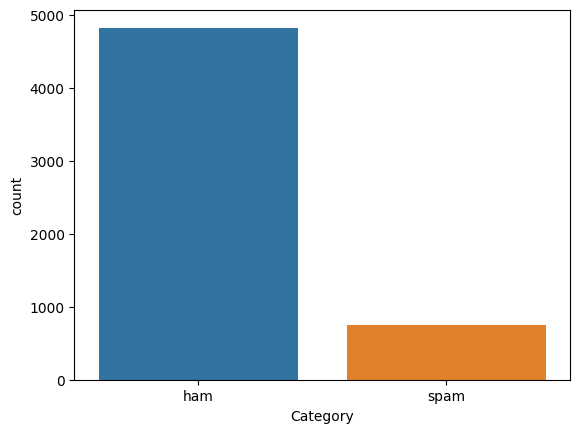

In [371]:
Class_Count(df)

In [372]:
# label encoding

def label_Encoding(df):
    le = LabelEncoder()
    df['Category_label'] = le.fit_transform(df['Category'])
    return(df)

In [373]:
label_Encoding(df)

,Category,Message,Category_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [374]:
# counting words in string

df['WordCount'] = df['Message'].str.split().str.len()

In [375]:
df.head()

,Category,Message,Category_label,WordCount
0,ham,"Go until jurong point, crazy.. Available only ...",0,20
1,ham,Ok lar... Joking wif u oni...,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,ham,U dun say so early hor... U c already then say...,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13


In [376]:
# convert to lower case and split

def lower_split(df):
    df['Message'] = df['Message'].str.lower().str.split()
    return df

In [377]:
lower_split(df)

,Category,Message,Category_label,WordCount
0,ham,"[go, until, jurong, point,, crazy.., available...",0,20
1,ham,"[ok, lar..., joking, wif, u, oni...]",0,6
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...",1,28
3,ham,"[u, dun, say, so, early, hor..., u, c, already...",0,11
4,ham,"[nah, i, don't, think, he, goes, to, usf,, he,...",0,13
...,...,...,...,...
5567,spam,"[this, is, the, 2nd, time, we, have, tried, 2,...",1,30
5568,ham,"[will, ü, b, going, to, esplanade, fr, home?]",0,8
5569,ham,"[pity,, *, was, in, mood, for, that., so...any...",0,10
5570,ham,"[the, guy, did, some, bitching, but, i, acted,...",0,26


In [378]:
def remove_alphanumeric(lower):
    for line in lower:
        for word in line:
            word.join(c for c in word if c.isalnum())
    
    return lower
    

In [379]:
alpha = remove_alphanumeric(df['Message'])

In [380]:
alpha

0       [go, until, jurong, point,, crazy.., available...
1                    [ok, lar..., joking, wif, u, oni...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor..., u, c, already...
4       [nah, i, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ü, b, going, to, esplanade, fr, home?]
5569    [pity,, *, was, in, mood, for, that., so...any...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                    [rofl., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

In [381]:
# converting back to sentence

def converting_sentence(tokens):
    string = ""
    for i in tokens:
        string = string + " " + i
    return string[1:]
        

In [382]:
for i in range(len(alpha)):
    alpha[i] = converting_sentence(alpha[i])

C:\Users\Asher\AppData\Local\Temp\ipykernel_7092\614231255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alpha[i] = converting_sentence(alpha[i])


In [383]:
df.head()

,Category,Message,Category_label,WordCount
0,ham,"go until jurong point, crazy.. available only ...",0,20
1,ham,ok lar... joking wif u oni...,0,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,28
3,ham,u dun say so early hor... u c already then say...,0,11
4,ham,"nah i don't think he goes to usf, he lives aro...",0,13


In [384]:
x = df['Message']
y = df['Category']

In [385]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=25, shuffle = True)

In [386]:
from sklearn.feature_extraction.text import CountVectorizer

In [387]:
# Count Vectorizer

vector = CountVectorizer().fit(x_train)
x_train = vector.transform(x_train).toarray()
x_test = vector.transform(x_test).toarray()

In [388]:
model = GaussianNB()

In [389]:
model.fit(x_train, y_train)

GaussianNB()

In [391]:
predictions = model.predict(x_test)
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [393]:
score = accuracy_score(y_test, predictions) * 100
score

90.81119885139985

In [394]:
f1Score = f1_score(y_test, predictions, average='micro') * 100
f1Score

90.81119885139985

In [395]:
model = BernoulliNB()

In [396]:
model.fit(x_train, y_train)

BernoulliNB()

In [397]:
predictions = model.predict(x_test)
predictions

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [398]:
score = accuracy_score(y_test, predictions) * 100
score

97.48743718592965

In [399]:
f1Score = f1_score(y_test, predictions, average='micro') * 100
f1Score

97.48743718592965